# Mini Proyecto 1

* José Cifuentes - 17509
* Oscar Juárez - 17315

**Librerías a utilizar:**


In [ ]:
import numpy as np
import PIL
import math
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
from random import random

## 1. El triángulo de Shierpinski

Se trabajará con la librería Pillow para crear una imágen en un lienzo. La función DibujarPuntos crea un punto de color blanco en las coordenadas especificadas.

In [ ]:
'''
  parametro puntos es una lista de tuplas x,y
  Ej:
    [(1,1),(5,5),(10,10),(20,20)]
'''
def DibujarPuntos(puntos):
  w, h = max(puntos)[0]+20, max(puntos)[1]+20  
  img = Image.new("RGB", (w, h))
  img1 = ImageDraw.Draw(img)

  # Por cada punto en la lista, se crea un pixel en su respectiva posición
  for index in range(0,len(puntos)-1):
    try:
      punto1 = int(puntos[index][0])
      punto2 = int(puntos[index][1])
      img1.point(
        (
          punto1, punto2
        ),
        fill = (255,255,255))
    except:
      pass
  return img


Siguiente, se usarán las funciones determinísticas.


In [ ]:
def F1(punto):
  return (punto[0]/2,punto[1]/2)

def F2(punto):
  return (punto[0]/2 + 0.5, punto[1]/2)

def F3(punto):
  return (punto[0]/2 +0.25,punto[1]/2 +0.5)

Procedemos a crear una función que cree un fractal con el uso de las funciones y números aleatorios

In [ ]:
def TrianguloShierpinski(randoms, puntoInicial, probs):
  puntosDibujo = [puntoInicial]
  for i in randoms:
    if(0 <= i <= probs[0]):
      # F1
      puntosDibujo.append(F1(puntosDibujo[-1]))

    elif(probs[0] < i <= probs[1]):
      # F2
      puntosDibujo.append(F2(puntosDibujo[-1]))

    else:
      # F3
      puntosDibujo.append(F3(puntosDibujo[-1]))
  return puntosDibujo


Ahora, hacemos uso de la función previamente creada. Como prueba inicial, se usarán las siguientes probabilidades en la función:

* p1: 0.2
* p2: 0.5
* p3: 0.3

> Por lo tanto: P(X=x1)=0.2, P(X=x2)=0.5, P(X=x3)=0.3





In [ ]:
# Primero definimos una lista de números rándom
mis_randoms = np.random.uniform(0,1,100000)

# Aplicamos la función.
puntosTriangulo = TrianguloShierpinski(mis_randoms, (1,1), [0.2,0.7,0.3])

# Usamos la función para dibujar puntos.
ImageOps.flip(
    DibujarPuntos(
        [(x*500,y*500) for (x,y) in puntosTriangulo]
        )
    )

Como se puede observar, la imágen parece tener más concentración en las partes derechas de los triángulos y una densidad mucho menor en las partes izquierdas.

Por consiguiente, se propone el uso de probabilidades más balanceadas con el fin de obtener una imágen más densa en todos sus lados:

* p1: 0.33
* p2: 0.33
* p3: 0.34

> Por lo tanto: P(X=x1)=0.33, P(X=x2)=0.33, P(X=x3)=0.34

In [ ]:
# Primero definimos una lista de números rándom
mis_randoms = np.random.uniform(0,1,100000)

# Aplicamos la función.
puntosTriangulo = TrianguloShierpinski(mis_randoms, (1,1), [0.33,0.66,0.34])

# Usamos la función para dibujar puntos.
ImageOps.flip(
    DibujarPuntos(
        [(x*500,y*500) for (x,y) in puntosTriangulo]
        )
    )

Dada la imágen anterior, es posible denotar que una función con probabilidades muy parecidas crearán un triángulo mucho más denso y balanceado.

##2. El	helecho	de	Barnsley

Lo primero es asignar las funciones F del framework.


In [ ]:
def F1(punto):
  return (punto[0]*0.85+punto[1]*0.04,
         punto[0]*-0.04+punto[1]*0.85+1.6
         )

def F2(punto):
  return (-0.15*punto[0]+0.28*punto[1],
         punto[0]*0.26+punto[1]*0.24+0.44
         )
def F3(punto):
  return (punto[0]*0.2+punto[1]*-0.26,
         punto[0]*0.23+punto[1]*0.22+1.6
         )
def F4(punto):
  return (punto[0]*0.0+punto[1]*0.0,
         punto[0]*0.0+punto[1]*0.16
         )

Luego, se definen las siguientes probabilidades:

**P={0.85, 0.07, 0.07, 0.01}**

In [ ]:
def HelechoBarnsley(randoms,puntoInicial):
  puntosDibujo=[puntoInicial]
  for i in randoms:
    if(0<=i<=0.85):
      # F1
      puntosDibujo.append(F1(puntosDibujo[-1]))

    elif(0.85<i<=0.92):
      # F2
      puntosDibujo.append(F2(puntosDibujo[-1]))

    elif(0.92<i<=0.99):
      # F3
      puntosDibujo.append(F3(puntosDibujo[-1]))
    else:
      # F4
      puntosDibujo.append(F4(puntosDibujo[-1]))

  return puntosDibujo

Ahora, dada una serie de números aleatorios y un **n=100000**

In [ ]:
mis_randoms=np.random.uniform(0,1.01,100000)

puntosHelecho = HelechoBarnsley(mis_randoms,(1,1))

puntosHelechoAumentado=[]
for x,y in puntosHelecho:
  puntosHelechoAumentado.append((int(x*80),int(y*80)))

DibujarPuntos([(int(x*80),int(y*80)) for (x,y) in puntosHelecho])

## 3. Análisis de pseudorandoms

Primero, creamos una función que genere número pseudo aleatorios

In [ ]:
def pseudo(a,m):
	def inner_pseudo(xo,n):
		items=list(range(n))
		items[0]=xo

		for i in range(1,n):
			items[i]=(a*items[i-1])%m

		return [i/float(m) for i in items]
	return inner_pseudo

Podemos luego definir el generador 1 y 2, respectivamente:

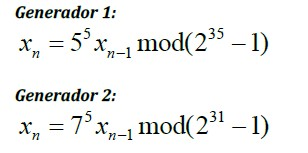

In [ ]:
mi_pseudo1=pseudo(m=2**35-1,a=5**5)

mi_pseudo2=pseudo(m=2**31-1,a=7**5)

El último generador está dado con el uso de la librería random en python

### Comparación con 100 repeticiones

In [ ]:
CANTIDAD=100
mis_randoms1=mi_pseudo1(xo=5,n=CANTIDAD)
mis_randoms2=mi_pseudo2(xo=5,n=CANTIDAD)
mis_randoms3=[random() for _ in range(CANTIDAD)]

In [ ]:
%matplotlib inline
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms1,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador 1')
plt.show()

In [ ]:
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms2,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador 2')
plt.show()

In [ ]:
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms3,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador Baseline')
plt.show()

### Comparación con 5000 repeticiones


In [ ]:
CANTIDAD=5000
mis_randoms1=mi_pseudo1(xo=5,n=CANTIDAD)
mis_randoms2=mi_pseudo2(xo=5,n=CANTIDAD)
mis_randoms3=[random() for _ in range(CANTIDAD)]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms1,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador 1')
plt.show()

In [ ]:
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms2,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador 2')
plt.show()

In [ ]:
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms3,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador Baseline')
plt.show()

### Comparación con 100000 repeticiones


In [ ]:
CANTIDAD=100000
mis_randoms1=mi_pseudo1(xo=5,n=CANTIDAD)
mis_randoms2=mi_pseudo2(xo=5,n=CANTIDAD)
mis_randoms3=[random() for _ in range(CANTIDAD)]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms1,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador 1')
plt.show()

In [ ]:
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms2,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador 2')
plt.show()

In [ ]:
mis_bins=np.arange(0,1,0.1)
plt.hist(mis_randoms3,np.arange(0,1,0.1),edgecolor='black', linewidth=1.2)
plt.ylabel('Frecuencia');
plt.xlabel('Numeros Random');
plt.title('Generador Baseline')
plt.show()

Con 100 repeticiones y en comparación al generador baseline, el generador 2 parece una mejor opción. Esto se debe a que, aún con poca cantidad de datos, el generador 2 parecer tener una distribución más normal en cuanto a sus resultados. Por otra parte, el generador 1 tiene la capacidad de generar más numeros cercanos a 0 y a 1.

Luego, pasando a las 5000 repeticiones, podemos notar un comportamiento más distribuido en ambos generadores. De igual forma, el generador 1 parece tener más tendencia a repetir ciertos número de forma más abrupta que el generador 2.

Con 100000 repeticiones, ambos generados son suficientemente eficientes, no obstante, el problema de generador 1 aún persiste. Se puede notar que este aún genera ciertos números con mayor frecuencia. Aunque la diferencia es muy sutil, el generador 2 parece que tiene valores más fluidos.

En conclusión, el **generador 2** se considera mejor.



## 4. Integral unidimensional

**Equivalencias 1**

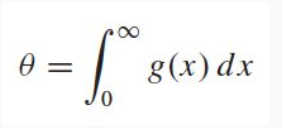
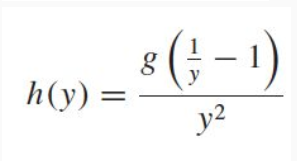
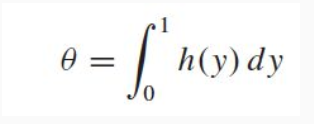

Inicialmente tenemos una integral con límites de menos infinito a infinito. Sacaremos provecho de las equivalencias 1 para convertir la integral a límites de 0 a 1. Si nos damos cuenta no tomaríamos en cuenta la mitad de los límites originales. Por lo que este resultado lo multiplicaremos por 2 para tener el resultado final. 

In [ ]:
funcion= lambda x: ((math.e) ** (-( (1/x) -1)**2)) / (x ** 2)

### 100 Iteraciones: 

In [ ]:
CANTIDAD=100
mi_pseudo=pseudo(m=2**31-1,a=7**5)
mis_randoms=mi_pseudo(xo=5,n=CANTIDAD)
a_evaluar=[funcion(i) for i in mis_randoms]
print(2*(sum(a_evaluar)/len(a_evaluar)))

### 10000 Iteraciones: 

In [ ]:
CANTIDAD=10000
mi_pseudo=pseudo(m=2**31-1,a=7**5)
mis_randoms=mi_pseudo(xo=5,n=CANTIDAD)
a_evaluar=[funcion(i) for i in mis_randoms]
print(2*(sum(a_evaluar)/len(a_evaluar)))

### 1000000 Iteraciones: 

In [ ]:
CANTIDAD=1000000
mi_pseudo=pseudo(m=2**31-1,a=7**5)
mis_randoms=mi_pseudo(xo=5,n=CANTIDAD)
a_evaluar=[funcion(i) for i in mis_randoms]
print(2*(sum(a_evaluar)/len(a_evaluar)))

Este es el resultado más acercado al definido en la hoja de trabajo.

## 5. Integral	bidimensional

**Equivalencias 2**

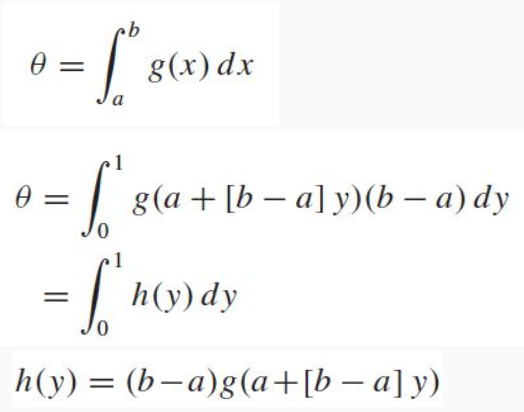

**Proceso:**

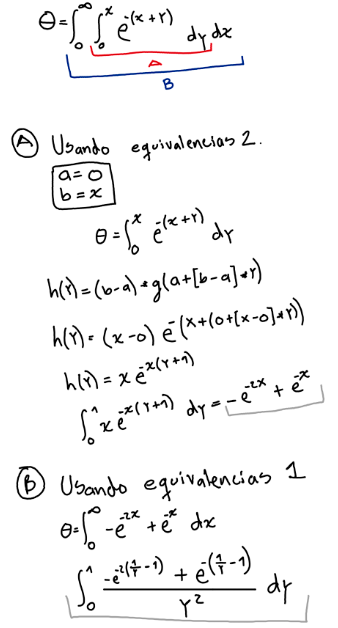

In [ ]:
funcion2= lambda x: ((-math.e**(-2*(1/x-1)))+(math.e**-(1/x-1)))/x**2

### 100 Iteraciones: 

In [ ]:
CANTIDAD=100
mi_pseudo=pseudo(m=2**31-1,a=7**5)
mis_randoms=mi_pseudo(xo=5,n=CANTIDAD)
a_evaluar=[funcion2(i) for i in mis_randoms]
print(sum(a_evaluar)/len(a_evaluar))

### 10000 Iteraciones: 

In [ ]:
CANTIDAD=10000
mi_pseudo=pseudo(m=2**31-1,a=7**5)
mis_randoms=mi_pseudo(xo=5,n=CANTIDAD)
a_evaluar=[funcion2(i) for i in mis_randoms]
print(sum(a_evaluar)/len(a_evaluar))

### 1000000 Iteraciones: 

In [ ]:
CANTIDAD=1000000
mi_pseudo=pseudo(m=2**31-1,a=7**5)
mis_randoms=mi_pseudo(xo=5,n=CANTIDAD)
a_evaluar=[funcion2(i) for i in mis_randoms]
print(sum(a_evaluar)/len(a_evaluar))

Resultado más cercano al de la hoja de trabajo.
